# Nürburgring Nordschleife Lap Times Exploratory Data Analysis

## Web Scraping

In [3]:
#import libraries

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
#use the request libraries to download the content from the webpage

r = requests.get("https://fastestlaps.com/tracks/nordschleife")
soup = BeautifulSoup(r.content)
#print(soup.prettify())

In [5]:
#locate the table on website

table = soup.find('table')

In [6]:
#extract the table rows by looping through the data

rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)


In [7]:
#convert the obtained data from the table into a pandas dataframe for EDA
df = pd.DataFrame(data, columns=['Rank','Vehicle','Driver','Time','PS/KG'])
df

,Rank,Vehicle,Driver,Time,PS/KG
0,None,None,None,None,None
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637
...,...,...,...,...,...
253,253.,Nissan Skyline GT-R (R33),Dirk Schoysman,7:59.89,280 / 1601
254,254.,Alpina B4 S Biturbo Coupé AWD,unknown,7:60.00,440 / 1731
255,255.,Nissan Skyline GT-R (R33),Motoharu Kurosawa,8:01.00,280 / 1601
256,256.,Bugatti EB 110 SS (US spec),unknown,8:01.00,600 / 1735


## Exploration

In [9]:
df.head(10)

,Rank,Vehicle,Driver,Time,PS/KG
0,None,None,None,None,None
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637
5,5.,Porsche 911 GT3 RS (992),Jörg Bergmeister,6:44.85,525 / 1483
6,6.,Lamborghini Aventador SVJ,Marco Mapelli,6:44.97,770 / 1718
7,7.,Radical SR8 RX,unknown,6:45.50,436 / 680
8,8.,Radical SR8LM,Michael Vergers,6:48.00,455 / 650
9,9.,Huracán Performante,Marco Mapelli,6:52.01,640 / 1562


In [10]:
# view the information at a glance of created data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     257 non-null    object
 1   Vehicle  257 non-null    object
 2   Driver   257 non-null    object
 3   Time     257 non-null    object
 4   PS/KG    257 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB


In [11]:
df.describe()

,Rank,Vehicle,Driver,Time,PS/KG
count,257,257,257,257,257
unique,257,218,49,164,219
top,1.,Porsche 911 Turbo S,unknown,7:59.00,- / -
freq,1,4,105,9,3


In [12]:
df.nunique()

Rank       257
Vehicle    218
Driver      49
Time       164
PS/KG      219
dtype: int64

## Data Preperation (cleaning)

In [14]:
#in checking for missing values, we see that the only entry with 'empty' values is the first one.
df.isnull().sum()

Rank       1
Vehicle    1
Driver     1
Time       1
PS/KG      1
dtype: int64

In [15]:
df.loc[0]

Rank       None
Vehicle    None
Driver     None
Time       None
PS/KG      None
Name: 0, dtype: object

In [16]:
# we will drop this entry from the data frame
df = df.dropna()
df

,Rank,Vehicle,Driver,Time,PS/KG
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637
5,5.,Porsche 911 GT3 RS (992),Jörg Bergmeister,6:44.85,525 / 1483
...,...,...,...,...,...
253,253.,Nissan Skyline GT-R (R33),Dirk Schoysman,7:59.89,280 / 1601
254,254.,Alpina B4 S Biturbo Coupé AWD,unknown,7:60.00,440 / 1731
255,255.,Nissan Skyline GT-R (R33),Motoharu Kurosawa,8:01.00,280 / 1601
256,256.,Bugatti EB 110 SS (US spec),unknown,8:01.00,600 / 1735


In [17]:
# look for entries where the Driver is "unknown"
unknown_drivers = df[df['Driver'] == 'unknown']
unknown_drivers.count()

Rank       105
Vehicle    105
Driver     105
Time       105
PS/KG      105
dtype: int64

In [18]:
# there are 105/257 entries where the driver is unknown.
# we will keep these entries for the analysis as Driver indentity is amongst the least important for our analysis.

In [19]:
# in examining the full table it is noticed that there are a few special case vehicles where the PS/Kg values arent stated.
mod_veh = df[df['PS/KG'] == '- / -']
mod_veh

,Rank,Vehicle,Driver,Time,PS/KG
11,11.,Porsche 911 GT3 RS Manthey Racing,Kevin Estre,6:54.34,- / -
16,16.,Modified Subaru WRX STI,unknown,6:57.50,- / -
33,33.,Modified Nissan GT-R Nismo (R35),Michael Krumm,7:08.68,- / -


In [20]:
# for our analysis we will remove these entries as they are outside the manufacturers norm.
df = df.drop(df[df['PS/KG'] == '- / -'].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 1 to 257
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     254 non-null    object
 1   Vehicle  254 non-null    object
 2   Driver   254 non-null    object
 3   Time     254 non-null    object
 4   PS/KG    254 non-null    object
dtypes: object(5)
memory usage: 11.9+ KB


In [21]:
#lets create a Poweer to Weight Ratio column that shows us the actual value.
#this is created from the 'PS/KG' column by computing the actual ratio.
#Also covert from metric Power to Horse Power and mass(Kg) to weight in lbs.

In [22]:
#first split Power and Weight into two seperate columns
df[['PS', 'KG']] = df['PS/KG'].str.split('/', expand=True)

#convert both to numeric values
df['PS'] = pd.to_numeric(df['PS'])
df['KG'] = pd.to_numeric(df['KG']) 

#convert to Power in HP and weight in lbs
df['HP'] = df['PS'] * 0.986
df['Weight(lbs)'] = df['KG'] *2.205

#compute the ratio and create new column called PWR
df['P/W_Ratio'] = df['HP'] / df['Weight(lbs)']

#new updated data frame
df

,Rank,Vehicle,Driver,Time,PS/KG,PS,KG,HP,Weight(lbs),P/W_Ratio
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695,1063,1695,1048.118,3737.475,0.280435
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430,700,1430,690.200,3153.150,0.218892
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390,1000,1390,986.000,3064.950,0.321702
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637,730,1637,719.780,3609.585,0.199408
5,5.,Porsche 911 GT3 RS (992),Jörg Bergmeister,6:44.85,525 / 1483,525,1483,517.650,3270.015,0.158302
...,...,...,...,...,...,...,...,...,...,...
253,253.,Nissan Skyline GT-R (R33),Dirk Schoysman,7:59.89,280 / 1601,280,1601,276.080,3530.205,0.078205
254,254.,Alpina B4 S Biturbo Coupé AWD,unknown,7:60.00,440 / 1731,440,1731,433.840,3816.855,0.113664
255,255.,Nissan Skyline GT-R (R33),Motoharu Kurosawa,8:01.00,280 / 1601,280,1601,276.080,3530.205,0.078205
256,256.,Bugatti EB 110 SS (US spec),unknown,8:01.00,600 / 1735,600,1735,591.600,3825.675,0.154639


In [23]:
df.dtypes

Rank            object
Vehicle         object
Driver          object
Time            object
PS/KG           object
PS               int64
KG               int64
HP             float64
Weight(lbs)    float64
P/W_Ratio      float64
dtype: object

In [24]:
# convert the 'Time' column from  string object time format to make it easier to work with

def time_to_float(time_str):
    minutes, seconds = time_str.split(':')
    return float(minutes) + float(seconds) / 60

df['Time_float(mins)'] = df['Time'].apply(time_to_float).astype('float64')


In [25]:
df

,Rank,Vehicle,Driver,Time,PS/KG,PS,KG,HP,Weight(lbs),P/W_Ratio,Time_float(mins)
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695,1063,1695,1048.118,3737.475,0.280435,6.511667
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430,700,1430,690.200,3153.150,0.218892,6.647333
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390,1000,1390,986.000,3064.950,0.321702,6.720000
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637,730,1637,719.780,3609.585,0.199408,6.727000
5,5.,Porsche 911 GT3 RS (992),Jörg Bergmeister,6:44.85,525 / 1483,525,1483,517.650,3270.015,0.158302,6.747500
...,...,...,...,...,...,...,...,...,...,...,...
253,253.,Nissan Skyline GT-R (R33),Dirk Schoysman,7:59.89,280 / 1601,280,1601,276.080,3530.205,0.078205,7.998167
254,254.,Alpina B4 S Biturbo Coupé AWD,unknown,7:60.00,440 / 1731,440,1731,433.840,3816.855,0.113664,8.000000
255,255.,Nissan Skyline GT-R (R33),Motoharu Kurosawa,8:01.00,280 / 1601,280,1601,276.080,3530.205,0.078205,8.016667
256,256.,Bugatti EB 110 SS (US spec),unknown,8:01.00,600 / 1735,600,1735,591.600,3825.675,0.154639,8.016667


# Analysis

In [27]:
# quickest vehicles around the track
df.groupby('Vehicle')['Time'].min().sort_values()

#Top 20 quickest Vehicles
top20_vehicles = df.groupby('Vehicle')['Time'].min().sort_values().head(20)
top20_vehicles

Vehicle
Mercedes - AMG One                   6:30.70
Porsche 911 GT2 RS Manthey Racing    6:38.84
McLaren P1 LM                        6:43.20
AMG GT Black Series                  6:43.62
Porsche 911 GT3 RS (992)             6:44.85
Lamborghini Aventador SVJ            6:44.97
Radical SR8 RX                       6:45.50
Radical SR8LM                        6:48.00
Huracán Performante                  6:52.01
Radical SR8                          6:55.00
Porsche 911 GT3 (992)                6:55.34
Porsche 918 Spyder                   6:57.00
Porsche 911 GT2 RS (991)             6:58.00
718 Cayman GT4 RS Manthey Per..      6:58.09
Ferrari 296 GTB                      6:58.70
911 GT3 Manthey Performance K..      6:59.42
Aventador LP750-4 SV                 6:59.73
Ferrari 488 Pista                    7:00.03
Rimac Nevera                         7:00.93
Dodge Viper ACR (Mk V)               7:01.30
Name: Time, dtype: object

In [28]:
# rank drivers by their fastest times
df.groupby(['Driver'])['Time'].min().sort_values()

#Top 5 fastest Drivers
top5_drivers = df.groupby(['Driver'])['Time'].min().sort_values().head()
top5_drivers

Driver
Maro Engel          6:30.70
Lars Kern           6:38.84
Kenny Brack         6:43.20
Jörg Bergmeister    6:44.85
Marco Mapelli       6:44.97
Name: Time, dtype: object

# Mercedes
mercedes holds the quickest lap time record, how is their performance amongst their other vehicles.


In [30]:
mb_veh = df[df['Vehicle'].str.contains('Mercedes|AMG', regex=True)]
mb_veh.head()

,Rank,Vehicle,Driver,Time,PS/KG,PS,KG,HP,Weight(lbs),P/W_Ratio,Time_float(mins)
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695,1063,1695,1048.118,3737.475,0.280435,6.511667
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637,730,1637,719.780,3609.585,0.199408,6.727000
10,10.,AMG GT Black Series,unknown,6:52.54,730 / 1637,730,1637,719.780,3609.585,0.199408,6.875667
26,26.,Mercedes-Benz AMG GT R Pro,Maro Engel,7:04.63,585 / 1637,585,1637,576.810,3609.585,0.159800,7.077167
30,30.,Mercedes-Benz AMG GT R Pro,Christian Gebhardt,7:07.00,585 / 1637,585,1637,576.810,3609.585,0.159800,7.116667


In [31]:
#They have 28 Vehicles on the lap time record list
mb_veh.count()

mb_veh.mean(numeric_only=True)
# Averages values of all their vehicles on the list

PS                   620.250000
KG                  1799.107143
HP                   611.566500
Weight(lbs)         3967.031250
P/W_Ratio              0.154985
Time_float(mins)       7.536327
dtype: float64

# Porsche

In [33]:
por_veh = df[df['Vehicle'].str.contains('Porsche')]
por_veh.head()

,Rank,Vehicle,Driver,Time,PS/KG,PS,KG,HP,Weight(lbs),P/W_Ratio,Time_float(mins)
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430,700,1430,690.200,3153.150,0.218892,6.647333
5,5.,Porsche 911 GT3 RS (992),Jörg Bergmeister,6:44.85,525 / 1483,525,1483,517.650,3270.015,0.158302,6.747500
12,12.,Porsche 911 GT3 RS (992),Christian Gebhardt,6:54.99,525 / 1483,525,1483,517.650,3270.015,0.158302,6.916500
14,14.,Porsche 911 GT3 (992),Lars Kern,6:55.34,510 / 1456,510,1456,502.860,3210.480,0.156631,6.922333
15,15.,Porsche 918 Spyder,Marc Lieb,6:57.00,887 / 1668,887,1668,874.582,3677.940,0.237791,6.950000


In [34]:
#They have 63 Vehicles on the lap time record list
por_veh.count()

por_veh.mean(numeric_only=True)
# Averages values of all their vehicles on the list

PS                   497.730159
KG                  1532.523810
HP                   490.761937
Weight(lbs)         3379.215000
P/W_Ratio              0.145378
Time_float(mins)       7.505053
dtype: float64

# McLaren

In [36]:
mcl_veh = df[df['Vehicle'].str.contains('McLaren')]
mcl_veh.head()

,Rank,Vehicle,Driver,Time,PS/KG,PS,KG,HP,Weight(lbs),P/W_Ratio,Time_float(mins)
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390,1000,1390,986.00,3064.950,0.321702,6.720000
32,32.,McLaren 720S,Christian Gebhardt,7:08.00,720 / 1429,720,1429,709.92,3150.945,0.225304,7.133333
34,34.,McLaren 600LT,Christian Gebhardt,7:08.82,600 / 1404,600,1404,591.60,3095.820,0.191096,7.147000
44,44.,McLaren 720S,unknown,7:14.00,720 / 1429,720,1429,709.92,3150.945,0.225304,7.233333
87,87.,McLaren MP4-12C,Horst von Saurma,7:28.00,600 / 1458,600,1458,591.60,3214.890,0.184019,7.466667


In [37]:
#They have 8 Vehicles on the lap time record list
mcl_veh.count()

mcl_veh.mean(numeric_only=True)
# Averages values of all their vehicles on the list

PS                   695.750000
KG                  1507.750000
HP                   686.009500
Weight(lbs)         3324.588750
P/W_Ratio              0.209024
Time_float(mins)       7.322958
dtype: float64

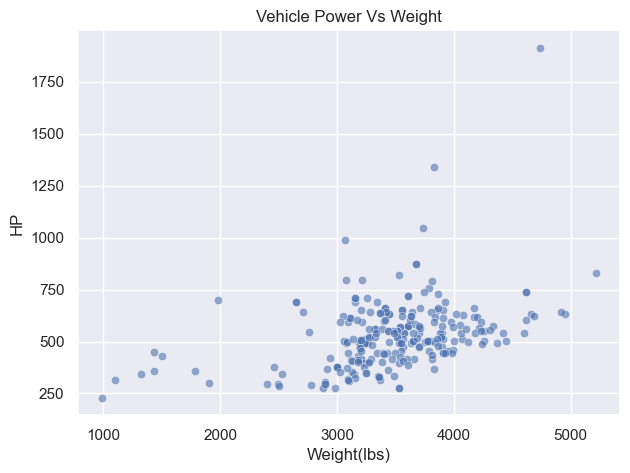

In [38]:
# Compare the different vehicles in terms of their Power and Weight to see where the majority lays.

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df, y='HP', x='Weight(lbs)', alpha=0.6)

plt.title('Vehicle Power Vs Weight')
plt.show()

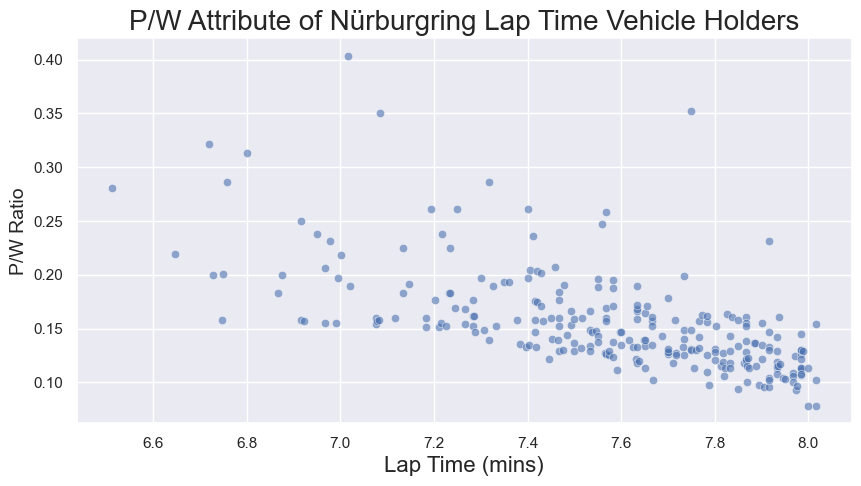

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(df, x='Time_float(mins)', y='P/W_Ratio', alpha=0.6)

ax.set_xlabel('Lap Time (mins)', size=16)
ax.set_ylabel('P/W Ratio', size=14)
ax.set_title('P/W Attribute of Nürburgring Lap Time Vehicle Holders', size =20)

plt.show()

### Lets look at the Top 10 quickest Vehicles and examine their attributes

In [41]:
df_10 = df.head(10)
df_10

,Rank,Vehicle,Driver,Time,PS/KG,PS,KG,HP,Weight(lbs),P/W_Ratio,Time_float(mins)
1,1.,Mercedes - AMG One,Maro Engel,6:30.70,1063 / 1695,1063,1695,1048.118,3737.475,0.280435,6.511667
2,2.,Porsche 911 GT2 RS Manthey Racing,Lars Kern,6:38.84,700 / 1430,700,1430,690.200,3153.150,0.218892,6.647333
3,3.,McLaren P1 LM,Kenny Brack,6:43.20,1000 / 1390,1000,1390,986.000,3064.950,0.321702,6.720000
4,4.,AMG GT Black Series,Maro Engel,6:43.62,730 / 1637,730,1637,719.780,3609.585,0.199408,6.727000
5,5.,Porsche 911 GT3 RS (992),Jörg Bergmeister,6:44.85,525 / 1483,525,1483,517.650,3270.015,0.158302,6.747500
6,6.,Lamborghini Aventador SVJ,Marco Mapelli,6:44.97,770 / 1718,770,1718,759.220,3788.190,0.200418,6.749500
7,7.,Radical SR8 RX,unknown,6:45.50,436 / 680,436,680,429.896,1499.400,0.286712,6.758333
8,8.,Radical SR8LM,Michael Vergers,6:48.00,455 / 650,455,650,448.630,1433.250,0.313016,6.800000
9,9.,Huracán Performante,Marco Mapelli,6:52.01,640 / 1562,640,1562,631.040,3444.210,0.183218,6.866833
10,10.,AMG GT Black Series,unknown,6:52.54,730 / 1637,730,1637,719.780,3609.585,0.199408,6.875667


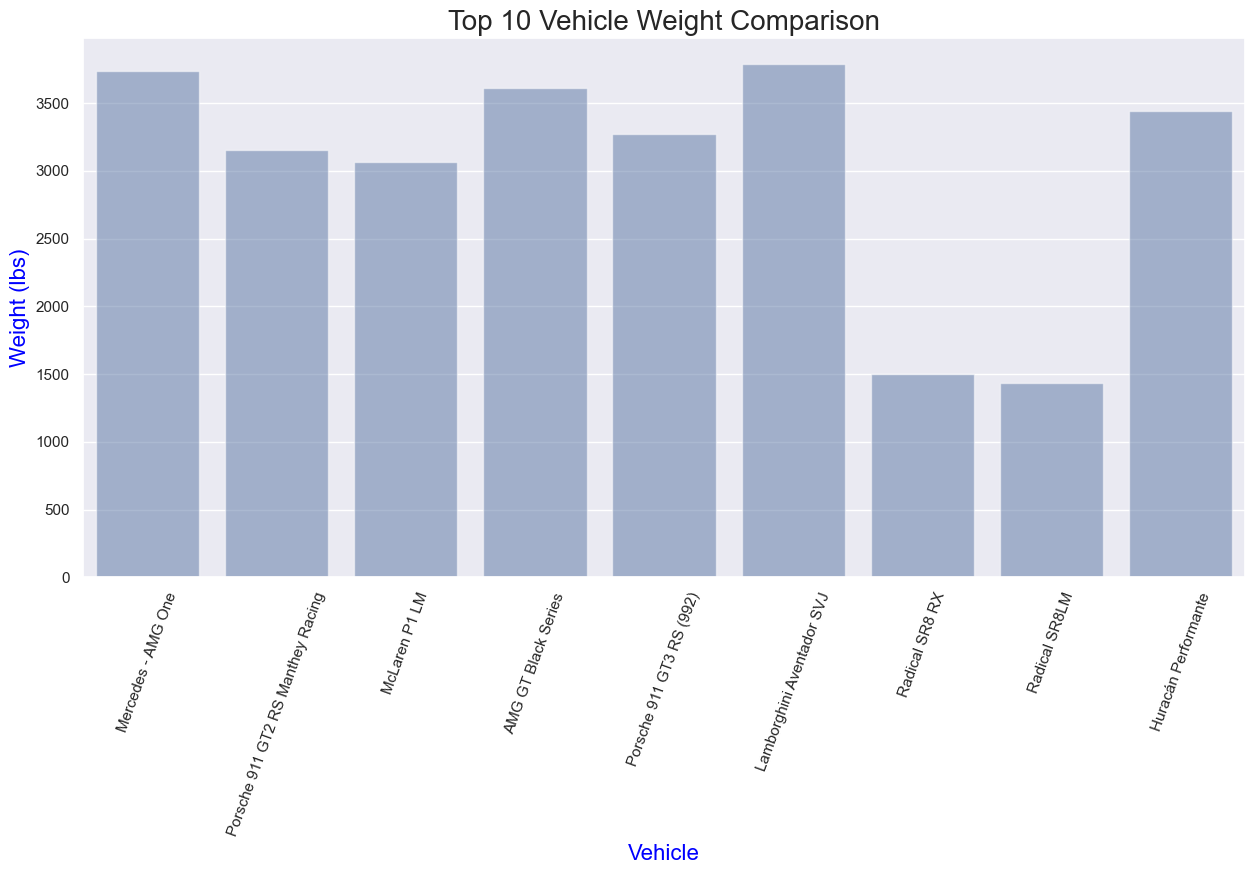

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(df_10, x='Vehicle', y='Weight(lbs)',alpha=0.5)
plt.xticks(rotation=70)

ax.set_title('Top 10 Vehicle Weight Comparison', size=20)
ax.set_ylabel('Weight (lbs)',color='blue', size=16)
ax.set_xlabel('Vehicle', color='blue', size=16)

plt.show()

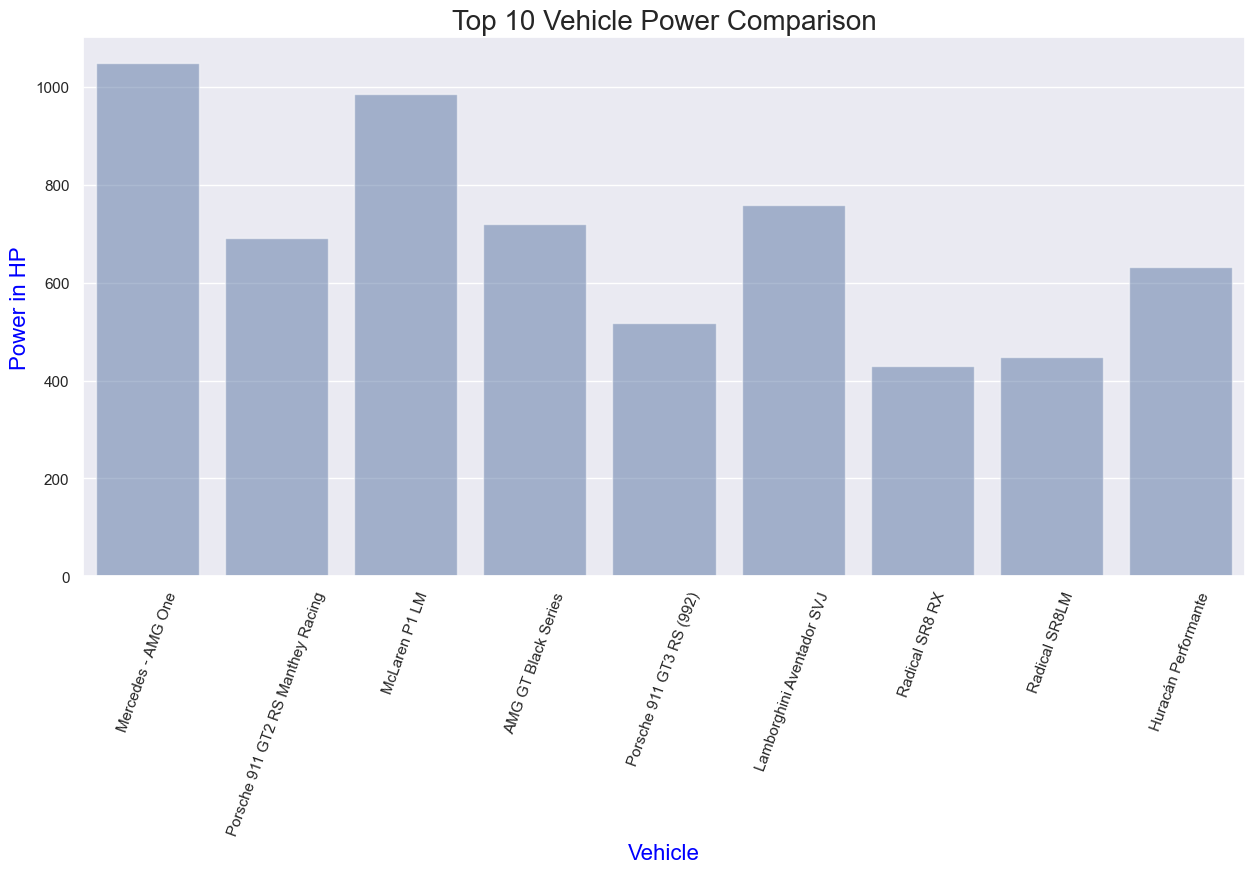

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(df_10, x='Vehicle', y='HP',alpha=0.5)
plt.xticks(rotation=70)

ax.set_title('Top 10 Vehicle Power Comparison', size=20)
ax.set_ylabel('Power in HP',color='blue', size=16)
ax.set_xlabel('Vehicle', color='blue', size=16)

plt.show()

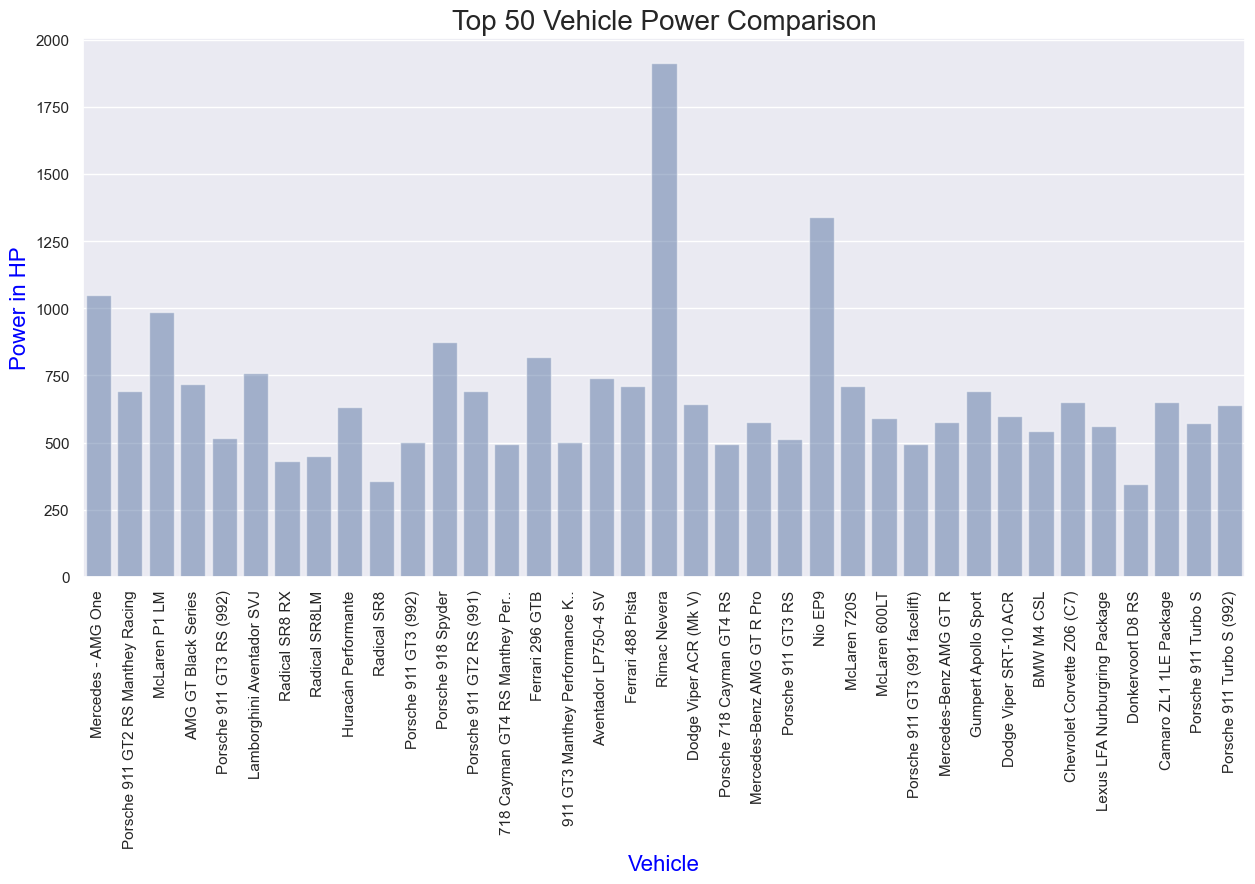

In [86]:
df_50 =  df.head(50)
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(df_50, x='Vehicle', y='HP',alpha=0.5)
plt.xticks(rotation=90)

ax.set_title('Top 50 Vehicle Power Comparison', size=20)
ax.set_ylabel('Power in HP',color='blue', size=16)
ax.set_xlabel('Vehicle', color='blue', size=16)

plt.show()

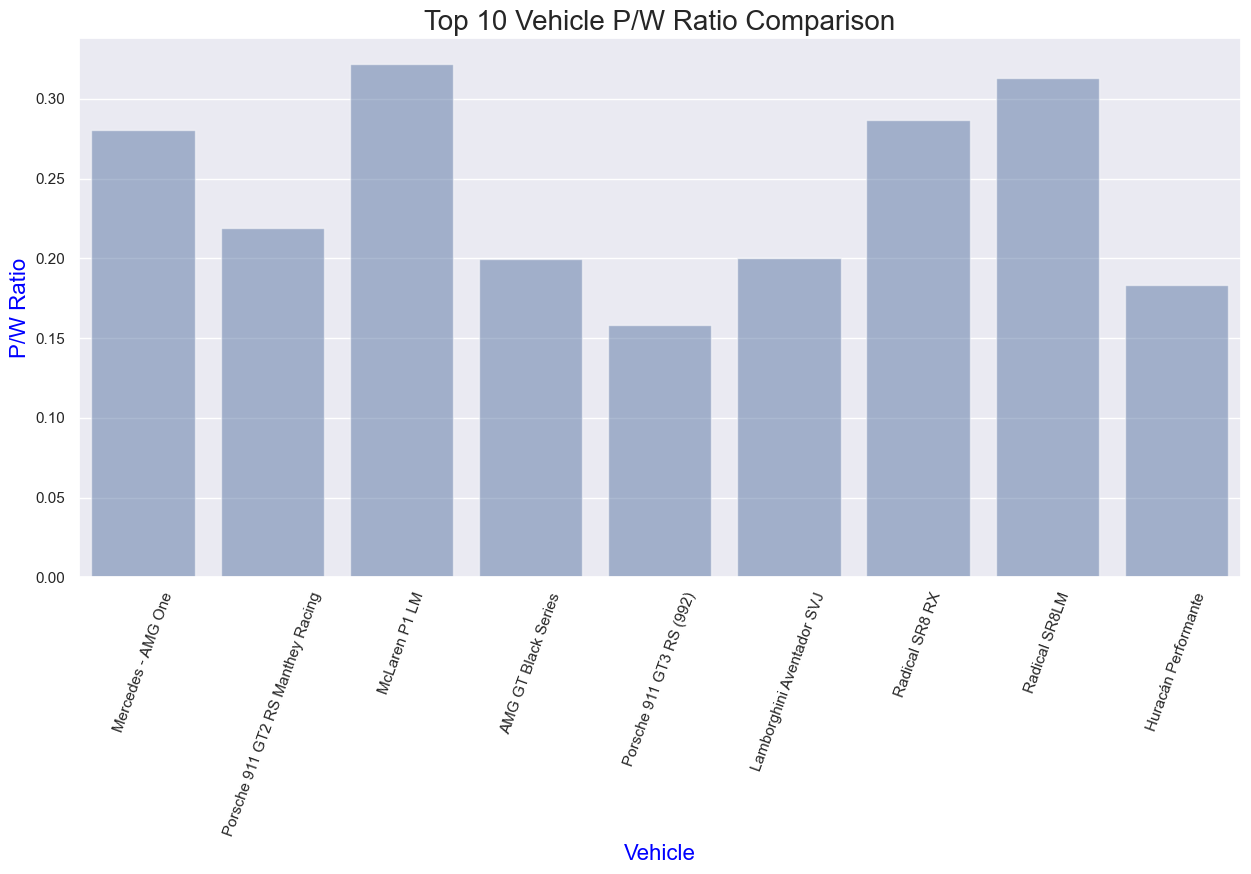

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(df_10, x='Vehicle', y='P/W_Ratio',alpha=0.5)
plt.xticks(rotation=70)

ax.set_title('Top 10 Vehicle P/W Ratio Comparison', size=20)
ax.set_ylabel('P/W Ratio',color='blue', size=16)
ax.set_xlabel('Vehicle', color='blue', size=16)

plt.show()